In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\Polo_Rank_Model\\Polo_Addr_Rank_Scored_PPD_DPC_Pop.csv', 
                 index_col=0)

In [5]:
df.head()

,LIC_STATE_MATCH,PCP,ENT_COMM_SRC_CAT_CODE,ENT_COMM_COMM_TYPE,ADDR_AGE_YRS,YOP_YRS,DOCTOR_AGE_YRS,PPD_ADDRESS_TYPE,PPD_REGION,PPD_DIVISION,...,POST_CITY_CD,POST_STATE_CD,POST_ZIP,ENT_COMM_BEGIN_DT,ENT_COMM_END_DT,ENT_COMM_COMM_ID,ENT_COMM_ENTITY_ID,PRED_CLASS,PRED_PROBABILITY,RANK_ROUND
0,0,1,GROUP,GROUP,15.986301,20.191781,47.208219,1,3,5,...,ASHEVILLE,NC,28805,2004-03-15 00:00:00.000000000,2020-03-06 12:14:36.822032896,6535763,1234606,0,0.071996,1
1,1,1,NPI,OF,4.435616,20.191781,60.219178,2,4,8,...,SUN CITY WEST,AZ,85375,2015-09-30 00:00:00.000000000,2020-03-06 12:14:36.822032896,15446117,1234619,1,0.953620,10
3,1,0,GROUP,GROUP,12.676712,20.191781,47.208219,2,3,6,...,TUSCALOOSA,AL,35406,2007-07-06 00:00:00.000000000,2020-03-06 12:14:36.822032896,6183992,1234658,1,0.918209,9
4,1,0,NPI,OF,2.441096,20.191781,47.208219,2,3,6,...,TUSCALOOSA,AL,35406,2017-09-27 00:00:00.000000000,2020-03-06 12:14:36.822032896,15249990,1234658,1,0.946257,9
5,0,0,GROUP,GROUP,8.482192,20.191781,46.208219,2,3,6,...,BOSTON,MA,2215,2011-09-14 00:00:00.000000000,2020-03-06 12:14:36.822032896,12155471,1234684,0,0.325441,3


In [6]:
from matplotlib import pyplot as plt

(array([ 12752.,  10513.,   6771.,  11237.,  16443.,  14129.,  17021.,
         15328.,  10710.,  12808.,  10027.,  16714.,  19957.,  21035.,
         29233.,  43488.,  47916.,  51610.,  84758., 128988.]),
 array([1.77289440e-05, 4.99717995e-02, 9.99258700e-02, 1.49879941e-01,
        1.99834011e-01, 2.49788082e-01, 2.99742152e-01, 3.49696223e-01,
        3.99650293e-01, 4.49604364e-01, 4.99558434e-01, 5.49512505e-01,
        5.99466576e-01, 6.49420646e-01, 6.99374717e-01, 7.49328787e-01,
        7.99282858e-01, 8.49236928e-01, 8.99190999e-01, 9.49145069e-01,
        9.99099140e-01]),
 <a list of 20 Patch objects>)

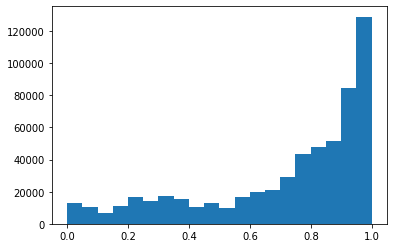

In [7]:
plt.hist(df['PRED_PROBABILITY'], bins=20)

### Mean Pred Probability by Source

In [15]:
df.groupby('ENT_COMM_SRC_CAT_CODE')['PRED_PROBABILITY'].mean().reset_index().sort_values(by='PRED_PROBABILITY', 
                                                                                         ascending=False).reset_index(drop=True)

,ENT_COMM_SRC_CAT_CODE,PRED_PROBABILITY
0,PHNSURV,0.937900
1,INTERACT,0.881136
2,MBSHP-PURL,0.837666
3,AMC,0.836844
4,MBSHP-PHON,0.830850
5,PHONE-CALL,0.830334
6,MBSHP-WEB,0.812807
7,WEBSURV,0.812471
8,USC-OUTBND,0.811901
9,REQ-CARDS,0.807097


In [16]:
df.groupby(['PPD_ME', 'ENT_COMM_COMM_ID'])['PRED_PROBABILITY'].mean().reset_index()

,PPD_ME,ENT_COMM_COMM_ID,PRED_PROBABILITY
0,102000030,6535763,0.071996
1,102000048,15446117,0.953620
2,102000072,6183992,0.918209
3,102000072,15249990,0.946257
4,102000099,12155471,0.325441
...,...,...,...
560033,96501930013,23614390,0.802988
560034,96501940019,1811164,0.979530
560035,96501940019,8312249,0.942846
560036,96501950014,15567013,0.933873


In [ ]:
pairs = df.set_index(['PPD_ME', 'ENT_COMM_COMM_ID'])
pairs.head()

(array([ 12685.,  10465.,   6726.,  11154.,  16279.,  13974.,  16873.,
         15091.,  10540.,  12643.,   9768.,  16402.,  19280.,  20249.,
         28105.,  41791.,  45140.,  48661.,  82042., 122170.]),
 array([1.77289440e-05, 4.99717995e-02, 9.99258700e-02, 1.49879941e-01,
        1.99834011e-01, 2.49788082e-01, 2.99742152e-01, 3.49696223e-01,
        3.99650293e-01, 4.49604364e-01, 4.99558434e-01, 5.49512505e-01,
        5.99466576e-01, 6.49420646e-01, 6.99374717e-01, 7.49328787e-01,
        7.99282858e-01, 8.49236928e-01, 8.99190999e-01, 9.49145069e-01,
        9.99099140e-01]),
 <a list of 20 Patch objects>)

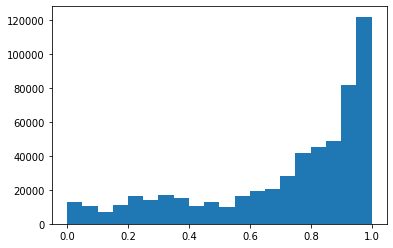

In [17]:
plt.hist(df.groupby(['PPD_ME', 'ENT_COMM_COMM_ID'])['PRED_PROBABILITY'].mean(), bins=20)

In [ ]:
df.groupby('ENT_COMM_SRC_CAT_CODE')['PRED_PROBABILITY'].mean().reset_index().sort_values(by='PRED_PROBABILITY', 
                                                                                         ascending=False).reset_index(drop=True)

In [8]:
df.dtypes

LIC_STATE_MATCH              int64
PCP                          int64
ENT_COMM_SRC_CAT_CODE       object
ENT_COMM_COMM_TYPE          object
ADDR_AGE_YRS               float64
YOP_YRS                    float64
DOCTOR_AGE_YRS             float64
PPD_ADDRESS_TYPE             int64
PPD_REGION                   int64
PPD_DIVISION                 int64
PPD_GROUP                    int64
PPD_MSA_POPULATION_SIZE     object
PPD_MD_DO_CODE               int64
PPD_MICRO_METRO_IND          int64
PPD_GENDER                   int64
PPD_TOP_CD                   int64
PPD_PE_CD                    int64
PPD_PRIM_SPEC_CD            object
PPD_POLO_STATE              object
HIST_ENT_ID_ADDR_COUNT       int64
HIST_ENT_ALL_ADDR_COUNT      int64
CURR_ENT_ID_ADDR_COUNT       int64
CURR_ENT_ALL_ADDR_COUNT      int64
CURR_USG_ALL_ADDR_COUNT    float64
PPD_ME                       int64
PPD_FIRST_NAME              object
PPD_MIDDLE_NAME             object
PPD_LAST_NAME               object
PPD_SUFFIX          

In [2]:
input_old = pd.read_csv('U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Polo_Rank_Model\\_Archived\\2019-10-22_PPD_20191012_Polo_Addr_Rank_Input_Data.csv',
                        index_col=0)

In [7]:
input_old.head()

,addr_age_yrs,curr_ent_id_addr_count,curr_ent_all_addr_count,curr_usg_all_addr_count,lic_state_match_0,lic_state_match_1,ent_comm_src_cat_code_ADMIT-HOS,ent_comm_src_cat_code_ECF-CNVRSN,ent_comm_src_cat_code_GROUP,ent_comm_src_cat_code_PHNSURV,ent_comm_src_cat_code_PHONE-CALL,ent_comm_src_cat_code_SCHL-HOSP,ent_comm_comm_type_GROUP,ent_comm_comm_type_OF,ppd_pe_cd_11,ppd_pe_cd_13,ppd_pe_cd_30,ppd_pe_cd_110
0,15.613699,1,9,13.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,4.063014,1,30,100.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,12.304110,2,31,36.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,2.068493,2,31,36.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,8.109589,1,919,1470.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [4]:
input_new = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\Polo_Rank_Model\\_Archived\\2020-03-06_PPD_20200222_Polo_Addr_Rank_Input_Data.csv',
                        index_col=0)

In [8]:
input_new.head()

,addr_age_yrs,curr_ent_id_addr_count,curr_ent_all_addr_count,curr_usg_all_addr_count,lic_state_match_0,lic_state_match_1,ent_comm_src_cat_code_ADMIT-HOS,ent_comm_src_cat_code_ECF-CNVRSN,ent_comm_src_cat_code_GROUP,ent_comm_src_cat_code_PHNSURV,ent_comm_src_cat_code_PHONE-CALL,ent_comm_src_cat_code_SCHL-HOSP,ent_comm_comm_type_GROUP,ent_comm_comm_type_OF,ppd_pe_cd_11,ppd_pe_cd_13,ppd_pe_cd_30,ppd_pe_cd_110
0,15.986301,1,9,0.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,4.435616,1,31,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,12.676712,2,31,0.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,2.441096,2,31,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,8.482192,1,917,1.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


(array([524021.,  24398.,  15643.,   5991.,   3722.,   1631.,    768.,
          2020.,      0.,   2587.]),
 array([1.0000e+00, 4.0380e+02, 8.0660e+02, 1.2094e+03, 1.6122e+03,
        2.0150e+03, 2.4178e+03, 2.8206e+03, 3.2234e+03, 3.6262e+03,
        4.0290e+03]),
 <a list of 10 Patch objects>)

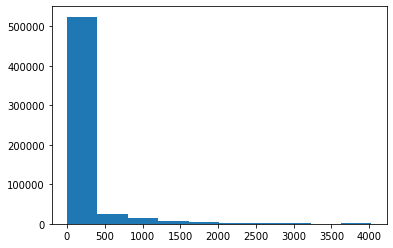

In [17]:
plt.hist(input_old['curr_usg_all_addr_count'].values, bins=10)

(array([5.65523e+05, 1.05430e+04, 4.57500e+03, 7.40000e+02, 3.00000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.50000e+01, 2.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

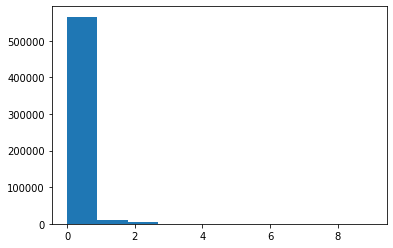

In [18]:
plt.hist(input_new['curr_usg_all_addr_count'].values, bins=10)

In [19]:
df = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\Polo_Rank_Model\\_Archived\\entity_addr_df.csv', 
                 index_col=0)

C:\Users\glappe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\glappe\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
df

,ent_comm_entity_id,ent_comm_comm_type,ent_comm_begin_dt,ent_comm_comm_id,ent_comm_end_dt,ent_comm_src_cat_code,post_comm_id,post_addr_line2,post_addr_line1,post_addr_line0,post_city_cd,post_state_cd,post_zip,post_plus4,ent_st_num,ent_addr_key
0,13422847,OF,1999/03/20,5833370,2003/02/05,ROSTER,5833370,5567 N MEADOWS BLVD,NaN,NaN,COLUMBUS,OH,43229,4180,5567,5567-43229
3,13429932,OF,1999/03/20,5833382,2001/09/02,ROSTER,5833382,20066 FAIRWAY DR,NaN,NaN,GROSSE PT WDS,MI,48236,2437,20066,20066-48236
7,13487379,OF,1999/03/20,5833560,2003/02/05,ROSTER,5833560,3 HIGHLAND CV,NaN,NaN,BIG SPRING,TX,79720,6634,3,3-79720
11,13489147,OF,1999/03/20,5833564,2000/07/08,OBSOLETE,5833564,2001 NORTH OREGON STREET,NaN,NaN,EL PASO,TX,79902,NaN,2001,2001-79902
12,13490694,OF,1999/03/20,5833568,2001/12/06,ROSTER,5833568,15 CREEKVIEW LN,NaN,NaN,DURHAM,NC,27705,5581,15,15-27705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28791668,28261177,OF,2020/02/21,24353848,NaN,ACS,24353848,101 RUE FONTAINE,# 1,NaN,LAFAYETTE,LA,70508,5744,101,101-70508
28791669,28659432,OF,2020/02/21,24353851,NaN,ACS,24353851,237 N 2ND ST,NaN,NaN,EUNICE,LA,70535,3337,237,237-70535
28791745,6728939,OF,2020/02/23,24357781,NaN,PHNSURV,24357781,4745 OGLETOWN STANTON RD,STE 217 # 1,NaN,NEWARK,DE,19713,2074,4745,4745-19713
28791746,11851342,OF,2020/02/23,24357865,NaN,PHNSURV,24357865,11011 MERIDIAN AVE N,NaN,NaN,BITTER LAKE,WA,98133,8967,11011,11011-98133


In [21]:
df.dtypes

ent_comm_entity_id        int64
ent_comm_comm_type       object
ent_comm_begin_dt        object
ent_comm_comm_id          int64
ent_comm_end_dt          object
ent_comm_src_cat_code    object
post_comm_id              int64
post_addr_line2          object
post_addr_line1          object
post_addr_line0          object
post_city_cd             object
post_state_cd            object
post_zip                 object
post_plus4               object
ent_st_num               object
ent_addr_key             object
dtype: object

In [22]:
df['post_comm_id'].value_counts()

726067      1703
12155471    1396
13838502    1201
8272393     1154
15622448     964
            ... 
7828478        1
4754433        1
4764678        1
4772874        1
2436561        1
Name: post_comm_id, Length: 1566651, dtype: int64

In [25]:
df.loc[28791669, 'ent_comm_end_dt']

nan

In [26]:
curr_df = df[df['ent_comm_end_dt'].isna()]
curr_df['post_comm_id'].value_counts()

726067      1695
939674       736
12155471     720
13838502     622
13814716     452
            ... 
19879126       1
8332504        1
6229213        1
24044768       1
11534336       1
Name: post_comm_id, Length: 469918, dtype: int64

In [27]:
curr_df['ent_addr_key'].value_counts()

200-55905     4786
9500-44195    2184
1500-48109    2106
55-02114      1974
330-02215     1799
              ... 
870-93230        1
550-33432        1
517-70583        1
1426-43545       1
932-85937        1
Name: ent_addr_key, Length: 160180, dtype: int64